In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [17]:
df = pd.read_csv(r"C:\Users\KHADIJA\Desktop\Final project course\Covid Data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [18]:

df["DATE_DIED"] = pd.to_datetime(df["DATE_DIED"], errors='coerce')
df["DIED"] = df["DATE_DIED"].notna().astype(int)  
print(df.describe())


              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01   

                           DATE_DIED       INTUBED     PNEUMONIA  \
count                          30492  1.048575e+06  1.048575e+06   
mean   2020-06-25 13:50:19.126328320  7.952288e+01  3.346831e+00   
min              2020-01-02 00:00:00  1.000000e+00  1.000000e+00   
25%              2020-04-05 00:00:00  9.700000e+01  2.000000e+00   
50%              2020-07-05 00:00:00  9.700000e+01  2.000000e+00   
75%   

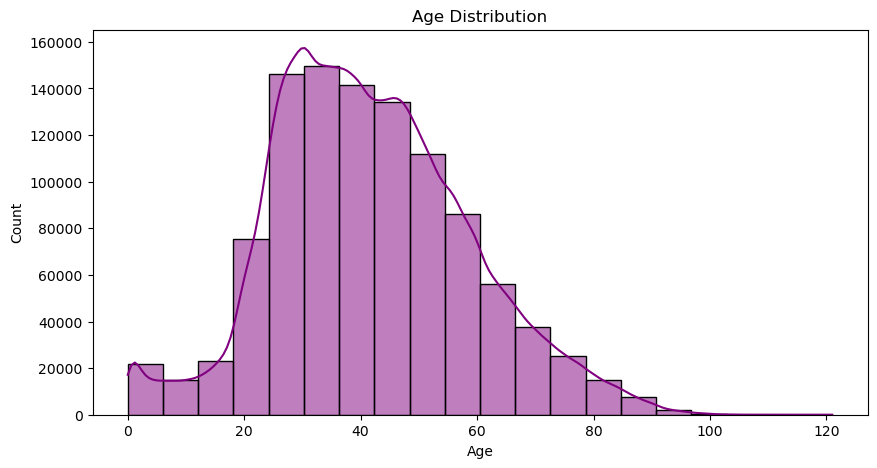

In [19]:

plt.figure(figsize=(10, 5))
sns.histplot(df["AGE"], bins=20, kde=True, color="purple")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\KHADIJA\AppData\Local\Temp\ipykernel_48472\1832059938.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_group = df.groupby(pd.cut(df["AGE"], bins=[0, 18, 30, 50, 70, 100])).agg({"DIED": "mean"})


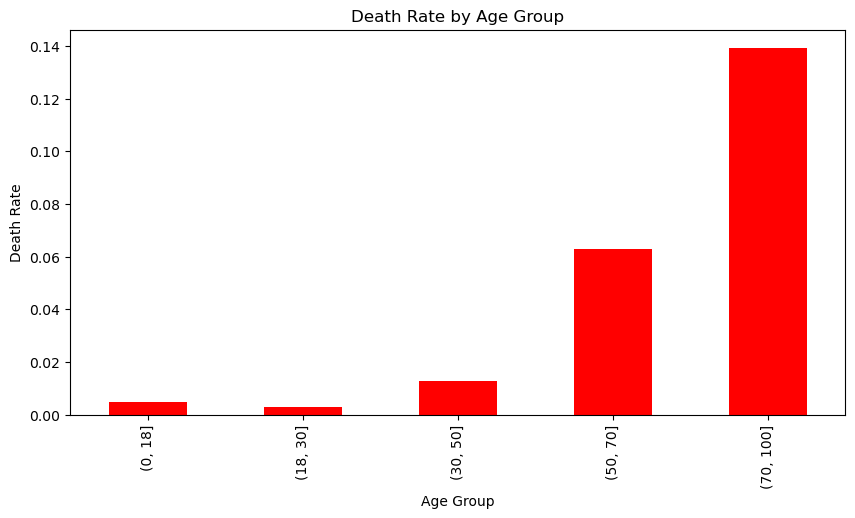

In [20]:

df_age_group = df.groupby(pd.cut(df["AGE"], bins=[0, 18, 30, 50, 70, 100])).agg({"DIED": "mean"})
df_age_group.plot(kind="bar", figsize=(10, 5), color="red", legend=False)
plt.title("Death Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Death Rate")
plt.show()

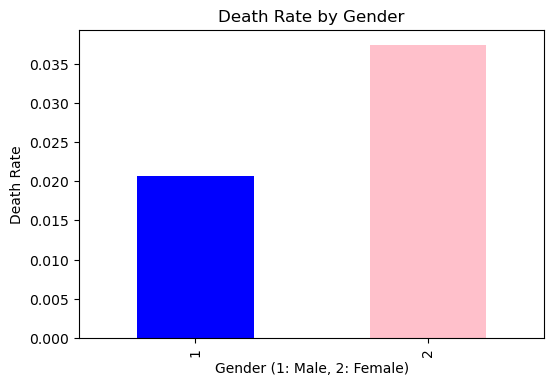

In [21]:

df_gender = df.groupby("SEX")["DIED"].mean()
df_gender.plot(kind="bar", figsize=(6, 4), color=['blue', 'pink'])
plt.title("Death Rate by Gender")
plt.xlabel("Gender (1: Male, 2: Female)")
plt.ylabel("Death Rate")
plt.show()

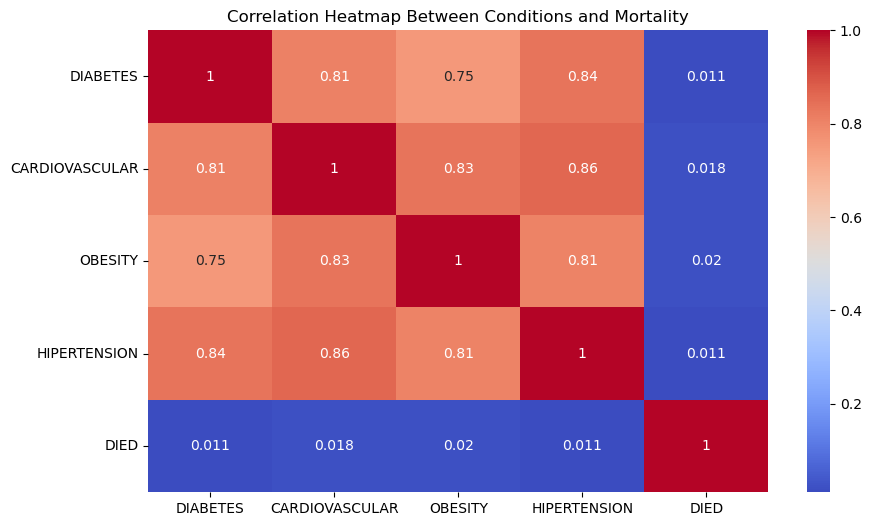

In [22]:

plt.figure(figsize=(10, 6))
sns.heatmap(df[["DIABETES", "CARDIOVASCULAR", "OBESITY", "HIPERTENSION", "DIED"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Between Conditions and Mortality")
plt.show()

Mortality rate for DIABETES:
 DIABETES
1     0.089784
2     0.020635
98    0.084182
Name: DIED, dtype: float64 



C:\Users\KHADIJA\AppData\Local\Temp\ipykernel_48472\1757401130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette="viridis")


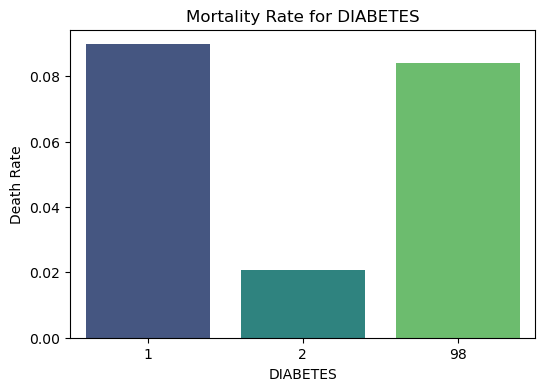

Mortality rate for CARDIOVASCULAR:
 CARDIOVASCULAR
1     0.085801
2     0.027746
98    0.090377
Name: DIED, dtype: float64 



C:\Users\KHADIJA\AppData\Local\Temp\ipykernel_48472\1757401130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette="viridis")


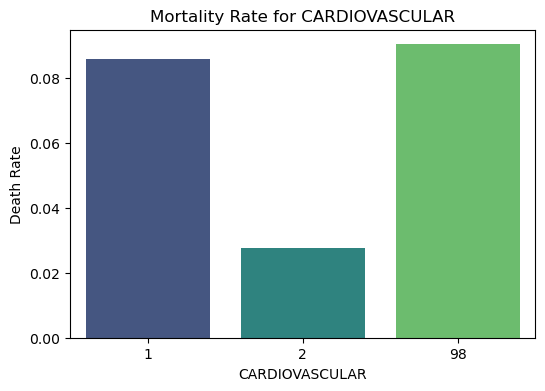

Mortality rate for OBESITY:
 OBESITY
1     0.042693
2     0.026381
98    0.099934
Name: DIED, dtype: float64 



C:\Users\KHADIJA\AppData\Local\Temp\ipykernel_48472\1757401130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette="viridis")


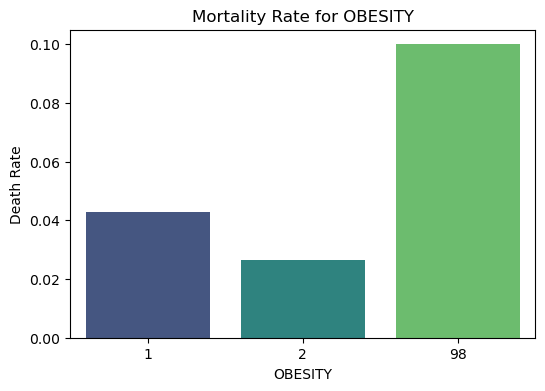

Mortality rate for HIPERTENSION:
 HIPERTENSION
1     0.078093
2     0.019833
98    0.089240
Name: DIED, dtype: float64 



C:\Users\KHADIJA\AppData\Local\Temp\ipykernel_48472\1757401130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette="viridis")


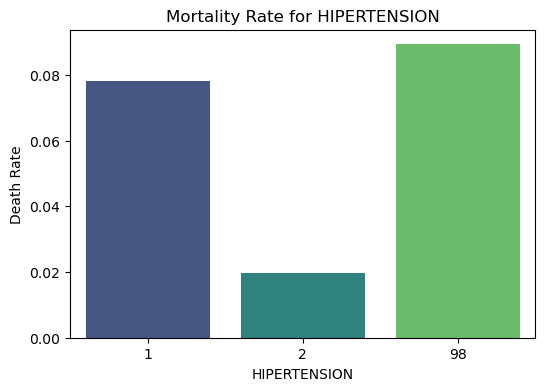

In [23]:

conditions = ["DIABETES", "CARDIOVASCULAR", "OBESITY", "HIPERTENSION"]
for condition in conditions:
    rate = df.groupby(condition)["DIED"].mean()
    print(f"Mortality rate for {condition}:\n", rate, "\n")
    plt.figure(figsize=(6, 4))
    sns.barplot(x=rate.index, y=rate.values, palette="viridis")
    plt.title(f"Mortality Rate for {condition}")
    plt.xlabel(condition)
    plt.ylabel("Death Rate")
    plt.show()

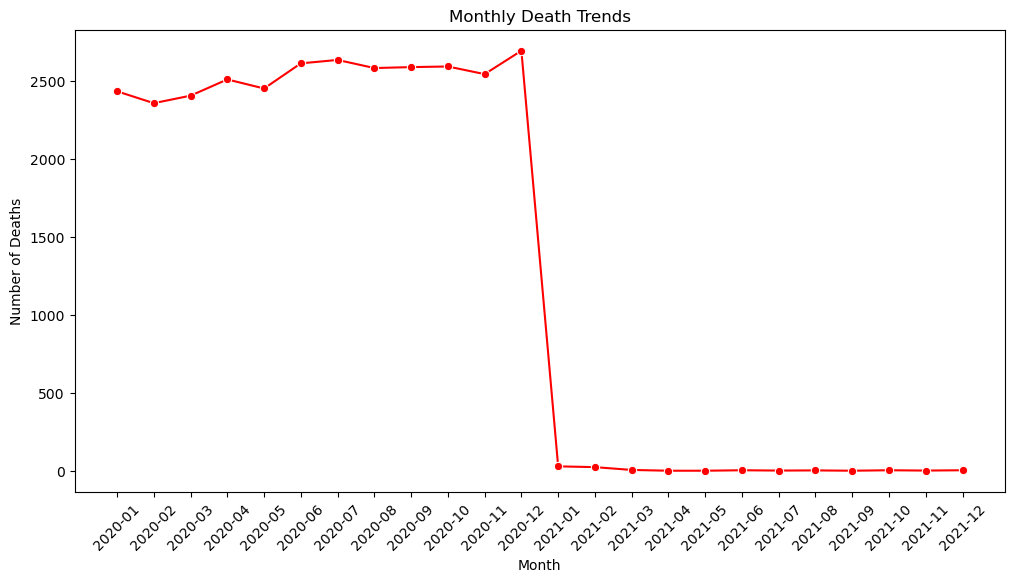

In [24]:

df["MONTH"] = df["DATE_DIED"].dt.to_period("M")
df_monthly = df.groupby("MONTH").agg({"DIED": "sum"})
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x=df_monthly.index.astype(str), y="DIED", marker="o", color="red")
plt.title("Monthly Death Trends")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.show()


In [25]:

table = pd.crosstab(df["SEX"], df["DIED"])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square test result for gender-based mortality: p-value = {p}")


Chi-square test result for gender-based mortality: p-value = 0.0


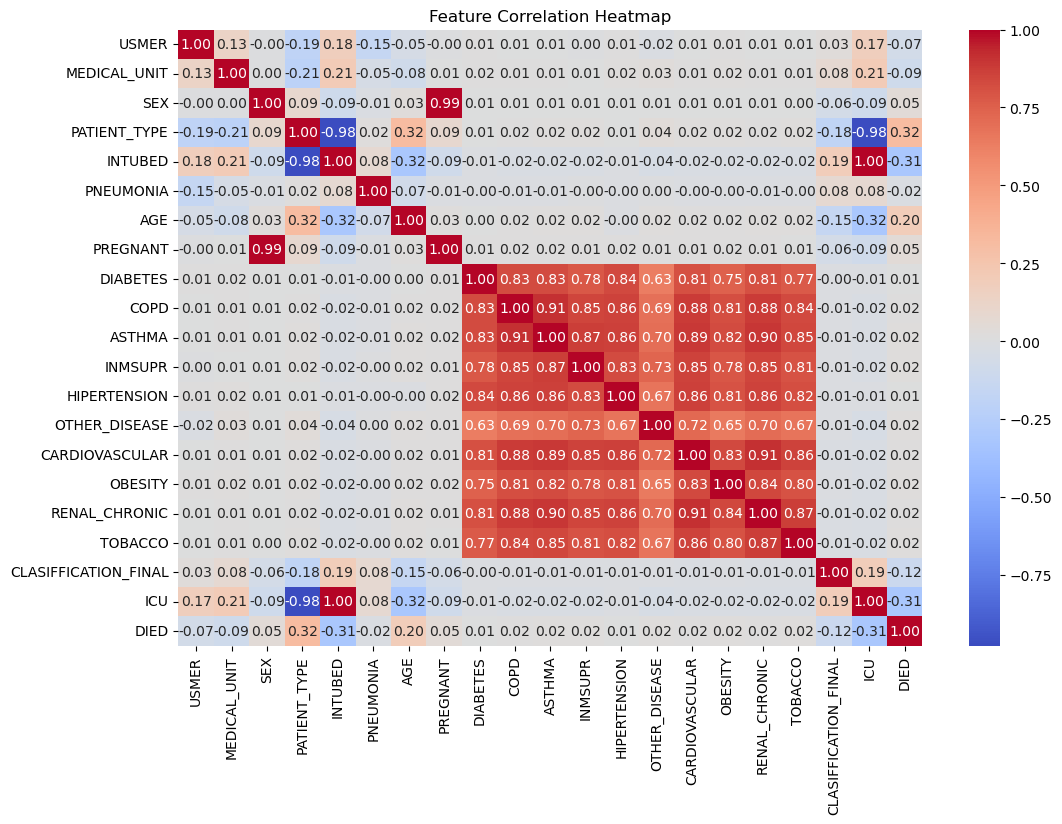

In [ ]:

if "MONTH" in df.columns:
    df = df.drop(columns=["MONTH"])  

df_numeric = df.select_dtypes(include=[np.number])

df_corr = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
